# PHY68 Project 4: Oscillator

By Phillip Roos, Won Kim, and Matt Silva

### Library Imports

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import math

### Set-Up

#### Obtaining Data from CSV File

In [20]:
time_vec = []

plt.style.use('ggplot') # plot formatting

csv_filename = 'arduino.txt'
data_headers = []
accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z = [], [], [], [], [], []

with open(csv_filename, newline='') as csvfile:
    
    csvreader = csv.reader(csvfile, delimiter=",")
    
    for row in csvreader:
        if data_headers == []:
            data_headers = row
            continue
            
        time_vec.append(float(row[0]))
        accel_x.append(float(row[1]))
        accel_y.append(float(row[2]))
        accel_z.append(float(row[3]))
        gyro_x.append(float(row[4]))
        gyro_y.append(float(row[5]))
        gyro_z.append(float(row[6]))

#### Calibrating Acceleration and Gyroscopic Data

In [21]:
accel_factor = ((2.0**15.0) - 1.0) / 2.0 # conversion using sensitivity (+- 2g)
gyro_factor = ((2.0**15.0) - 1.0) / 250.0 # conversion using sensitivity (250 deg/sec)
samp_rate = len(time_vec) / (time_vec[-1] - time_vec[0]) # psuedo sample rate

accel_x = np.array(accel_x) / accel_factor
accel_y = np.array(accel_y) / accel_factor
accel_z = np.array(accel_z) / accel_factor

gyro_x = np.array(gyro_x) / gyro_factor
gyro_y = np.array(gyro_y) / gyro_factor
gyro_z = np.array(gyro_z) / gyro_factor

cal_start = 0 # start calibration point
cal_end = 100 # end calibration point

# accel calibrations
a_x_cal = accel_x[cal_start:cal_end]
a_y_cal = accel_y[cal_start:cal_end]
a_z_cal = accel_z[cal_start:cal_end]

# gyro calibrations
g_x_cal = gyro_x[cal_start:cal_end]
g_y_cal = gyro_y[cal_start:cal_end]
g_z_cal = gyro_z[cal_start:cal_end]

# calculate accel & gyro calibration means
accel_offsets = [np.mean(a_x_cal), np.mean(a_y_cal), np.mean(a_z_cal)]
gyro_offsets = [np.mean(g_x_cal), np.mean(g_y_cal), np.mean(g_z_cal)]

grav_direc = np.argmax(accel_offsets) # location of gravity

# actual calculation of offset (subtracting starting means) 
accel_x = accel_x - accel_offsets[0]
accel_y = accel_y - accel_offsets[1]
accel_z = accel_z - accel_offsets[2]

gyro_x = gyro_x-gyro_offsets[0]
gyro_y = gyro_y-gyro_offsets[1]
gyro_z = gyro_z-gyro_offsets[2]

### Velocity Conversion

In [22]:
# Convert to velocity
vel_x = np.zeros([len(accel_x)])
vel_y = np.zeros([len(accel_y)])
vel_z = np.zeros([len(accel_z)])
vel_total = np.zeros([len(accel_x)])

for i in range(len(time_vec) - 1):
    vel_x[i + 1] = vel_x[i] + accel_x[i] * 0.1
    vel_y[i + 1] = vel_y[i] + accel_y[i] * 0.1
    vel_z[i + 1] = vel_z[i] + accel_z[i] * 0.1
    vel_total[i + 1] = np.sqrt(vel_x[i + 1]**2 + vel_y[i + 1]**2 + vel_z[i + 1]**2)

### Graphs

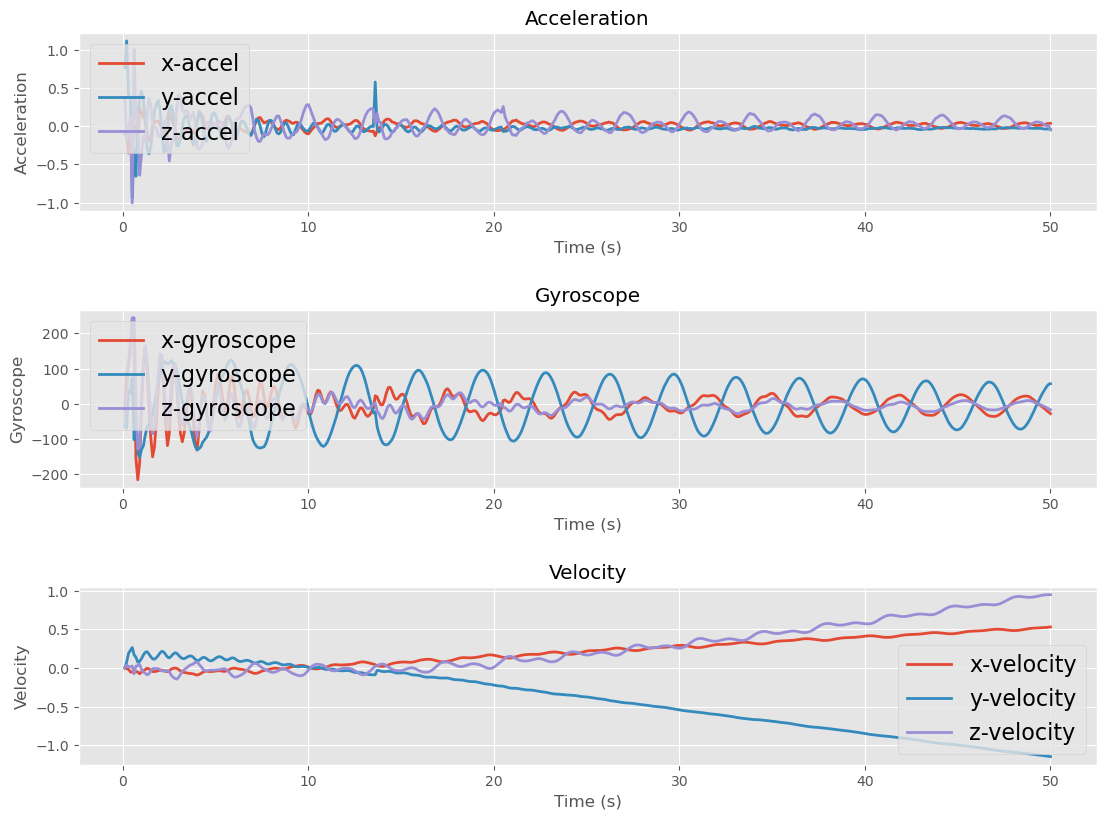

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(12, 9))

fig.tight_layout(pad=5.0)

# Acceleration Graph
ax1 = ax[0] # accel axis
# cmap = plt.cm.Set1
# print('Acceleration')
ax1.set_title("Acceleration")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Acceleration")
ax1.plot(time_vec, accel_x, label='x-accel', linewidth=2)
ax1.plot(time_vec, accel_y, label='y-accel', linewidth=2)
ax1.plot(time_vec, accel_z, label='z-accel', linewidth=2)
ax1.legend(fontsize=16)

# Gyroscope Graph
ax2 = ax[1] # gyro axis
# cmap = plt.cm.tab10
ax2.set_title("Gyroscope")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Gyroscope")
ax2.plot(time_vec, gyro_x, label='x-gyroscope', linewidth=2)
ax2.plot(time_vec, gyro_y, label='y-gyroscope', linewidth=2)
ax2.plot(time_vec, gyro_z, label='z-gyroscope', linewidth=2)
ax2.legend(fontsize=16)
#ax2.set_ylabel('Degrees [$^\circ$]',fontsize=16)

# Velocity Graph
ax3 = ax[2]
# cmap = plt.cm.tab10
ax3.set_title("Velocity")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity")
ax3.plot(time_vec, vel_x, label='x-velocity', linewidth=2)
ax3.plot(time_vec, vel_y, label='y-velocity', linewidth=2)
ax3.plot(time_vec, vel_z, label='z-velocity', linewidth=2)
# ax3.plot(time_vec, vel_total, label="total-velocity", linewidth=2)
ax3.legend(fontsize=16)

plt.show()

Max: 33 Min: 15


<function matplotlib.pyplot.show(close=None, block=None)>

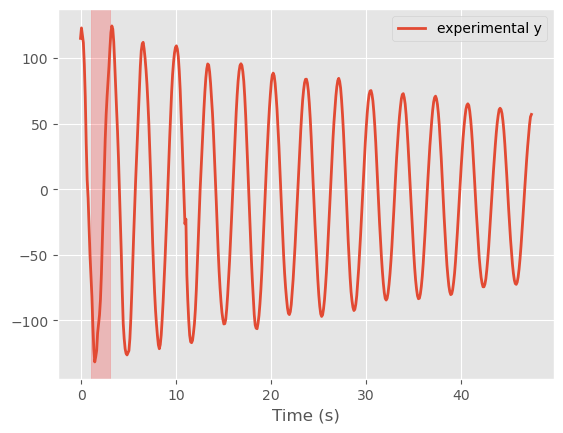

In [24]:
# Trim the data
cut = 24 #int to define starting point of data (removes data when pendulum was still)
exp_time = np.array(time_vec[cut:]) #
exp_time -= 2.6
exp_y = gyro_y[cut:]

# Find one full swing
max_index = np.argmax(exp_y)
min_index = np.argmin(exp_y)
print("Max:", max_index, "Min:", min_index)

plt.plot(exp_time, exp_y, label='experimental y', linewidth=2)
plt.xlabel('Time (s)')
plt.legend()
# Highlight the section of the data of a full swing
start_time = int(exp_time[min_index])
end_time = int(exp_time[max_index-1])
plt.axvspan(start_time, end_time, color='red', alpha=0.2)
plt.show


### 3D Plot

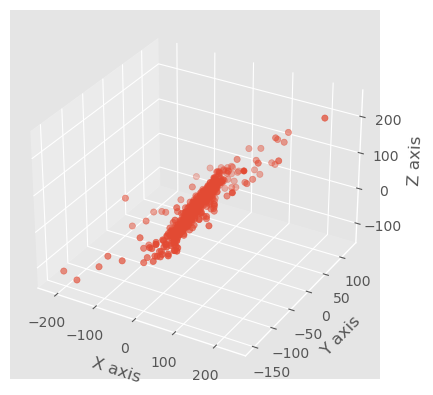

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the X, Y, Z coordinates
ax.scatter(gyro_x, gyro_y, gyro_z)

# Set the labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()

### Euler Simulation

This is an Euler Simulation with damping. 

The time step is  0.004800480048004801


<function matplotlib.pyplot.show(close=None, block=None)>

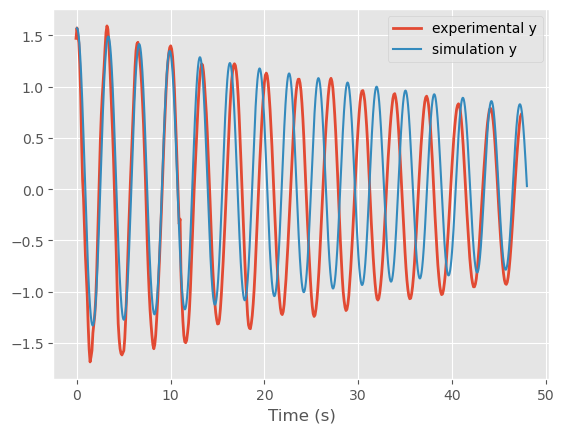

In [28]:
def simulate2(old_theta, old_vel, dt, damping):
    # Calculate the drag force
    rho = 1.2 # Air density (kg/m^3)
    A = 0.01 # Cross-sectional area of the pendulum (m^2)
    Cd = 5 # Drag coefficient of a cube
    v = old_vel * length # Velocity of the pendulum (m/s)
    drag_force = -0.5 * rho * A * Cd * v**2
    
    # Calculate the angular acceleration
    old_acc = gravity / length * math.sin(old_theta) - damping / length * old_vel - drag_force / length
    
    # Update the angular position and velocity
    new_theta = old_theta + old_vel * dt
    new_vel = old_vel + old_acc * dt
    
    return new_theta, new_vel 

def run_simulation2(end_time, steps, gravity, length, damping):
    # INITIAL CONDITIONS
    initial_theta = math.pi/2 #radians
    initial_vel = 0 #radians per second

    # TIME ARRAY
    time = np.linspace(0, end_time, steps)
    dt = time[1]-time[0]
    print("The time step is ", dt )

    # PRE-ALLOCATE ARRAYS FOR ANGULAR POSITION AND ANGULAR VELOCITY
    theta = np.empty(np.shape(time))
    velocity = np.empty(np.shape(time))
    acceleration = np.empty(np.shape(time))

    # Set the initial values of the arrays to the initial conditions
    theta[0] = initial_theta
    velocity[0] = initial_vel
    acceleration[0] = gravity / length * math.sin(initial_theta)

    # NUMERICAL METHOD ITERATION
    for i in range(1,np.size(time)):
        theta[i], velocity[i] = simulate2(theta[i-1], velocity[i-1], dt, damping)
        acceleration[i] = gravity / length * math.sin(theta[i]) - damping / length * velocity[i]

    return time, theta

# Run simulation
end_time = 48 #seconds
steps = 10000 #number of steps between time 0 and end time
gravity = -9.8 #meters per second per second
length = 2.1 #meters
damping = 0.09 # damping coefficient
time, theta = run_simulation2(end_time, steps, gravity, length, damping)

# Converting experimental data
cut = 24 #int to define starting point of data (removes data when pendulum was still)
exp_time = np.array(time_vec[cut:]) #
exp_time -= 2.6
exp_y = gyro_y[cut:]/78.15

plt.plot(exp_time, exp_y, label='experimental y', linewidth=2)
plt.plot(time, theta, label='simulation y')
plt.xlabel('Time (s)')
plt.legend()
plt.show

### Analytical Solution

In [95]:
# Constants (need to be updated accordingly)
A = 1.5 # amplitude (meters)
b = 0.010 # damping factor, b = c/2m
alpha = 1.85 # frequency (radians per second)
phi = 0 # phase shift

y = A * np.exp(-b * exp_time) * np.cos(alpha * exp_time - phi)

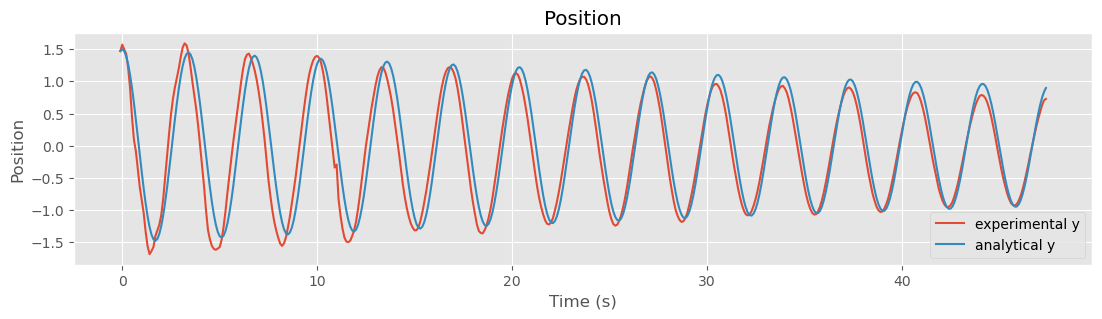

In [96]:
# Graphs

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

fig.tight_layout(pad=5.0)

# Position Graph
ax.set_title("Position")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position")
ax.plot(exp_time, exp_y, label="experimental y")
ax.plot(exp_time, y, label="analytical y")
ax.legend()